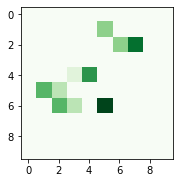

[array([[ 1.,  4.,  3.,  0.,  1.],
       [ 1.,  0.,  0., -1.,  0.]]), array([[ 2.,  6.,  3.,  0.,  2.],
       [ 1.,  0.,  0., -1., -1.]]), array([[ 3.,  2.,  6.,  0.,  2.],
       [ 1.,  0.,  0., -1., -1.]]), array([[ 4.,  6.,  2.,  0.,  2.],
       [ 1.,  0.,  0., -1., -1.]]), array([[5., 4., 4., 0., 1.],
       [1., 0., 0., 0., 0.]]), array([[ 6.,  2.,  7.,  0.,  1.],
       [ 1.,  0.,  0., -1.,  0.]]), array([[7., 6., 5., 0., 1.],
       [1., 0., 0., 0., 0.]])]
[array([[ 1.,  4.,  3.,  0.,  2.],
       [ 1.,  0.,  0., -1.,  0.]]), array([[ 2.,  6.,  3.,  0.,  4.],
       [ 1.,  0.,  0., -1., -1.]]), array([[ 3.,  2.,  6.,  0.,  4.],
       [ 1.,  0.,  0., -1., -1.]]), array([[ 4.,  6.,  2.,  0.,  4.],
       [ 1.,  0.,  0., -1., -1.]]), array([[5., 4., 4., 0., 2.],
       [1., 0., 0., 0., 0.]]), array([[ 6.,  2.,  7.,  0.,  2.],
       [ 1.,  0.,  0., -1.,  0.]]), array([[7., 6., 5., 0., 2.],
       [1., 0., 0., 0., 0.]])]
[array([[ 1.,  4.,  3.,  0.,  3.],
       [ 1.,  0.,  0., 

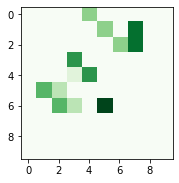

In [57]:
%reload_ext autoreload
%autoreload

import numpy as np
import creature_spawning.spawn_creature as sc
import visualization.creature_rendering as creature_render
import visualization.array_rendering as ar

def photosynthesize(world_params):
    # for plant_id in enumerate(world_params['world_array'][np.nonzero(world_params['world_array'])]):
    occupied_squares = np.nonzero(world_params['world_array'])
    for index, x in enumerate(occupied_squares[0]):
        y = occupied_squares[1][index]
        world_params['plants'][int(np.round(world_params['world_array'][x][y])) - 1][0][4] += 1
        world_params['carbon_dioxide_map'][x][y] -= 1

def grow_plants(world_params):
    new_growth = []
    for index, plant in enumerate(world_params['plants']):
        if plant[0][4] > 5:
            plant[0][4] = 0
            joined_seg = plant[np.random.randint(1, len(plant))]
            new_seg = [0, joined_seg[3], joined_seg[4], joined_seg[3] + np.random.randint(-1, 1), joined_seg[4] + np.random.randint(-1, 1)]
            new_growth.append((index, np.append(plant, [new_seg], 0)))

    for index, new_plant in new_growth:
        world_params['plants'][index] = new_plant



world_params = { 'world_size': 10,
                 'global_creature_id_counter': int(1) }

world_params['world_array'] = np.zeros(shape=(world_params['world_size'], world_params['world_size']), dtype=int)

world_params['carbon_dioxide_map'] = np.full(shape=(world_params['world_size'], world_params['world_size']),
                             fill_value=5)

sc.spawn_new_plants(world_params=world_params,
                             num_plants=7)

creature_render.place_creatures(world_params)

ar.render_array(world_params['world_array'])

photosynthesize(world_params)
grow_plants(world_params)
print(world_params['plants'])

photosynthesize(world_params)
grow_plants(world_params)
print(world_params['plants'])

photosynthesize(world_params)
grow_plants(world_params)
print(world_params['plants'])

photosynthesize(world_params)
grow_plants(world_params)
print(world_params['plants'])

photosynthesize(world_params)
grow_plants(world_params)
print(world_params['plants'])

photosynthesize(world_params)
grow_plants(world_params)
print(world_params['plants'])

photosynthesize(world_params)
grow_plants(world_params)
print(world_params['plants'])


creature_render.place_creatures(world_params)

ar.render_array(world_params['world_array'])